# Data 3
## Bank Marketing Data Set (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
## Description: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The dataset has total 20 features, and the target variable is a binary variable(yes/no) indicating whether the client subscribed a term deposit or not.
## Attributes:

### 1 - age (numeric)
### 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
### 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
### 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
### 5 - default: has credit in default? (categorical: 'no','yes','unknown')
### 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
### 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### 8 - contact: contact communication type (categorical: 'cellular','telephone') 
### 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
### 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
### 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
### 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
### 14 - previous: number of contacts performed before this campaign and for this client (numeric)
### 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [55]:
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv("bank-full.csv",sep=';')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
data.shape

(45211, 17)

In [59]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
target = data['y']
data = pd.get_dummies(data[data.columns.difference(['y'])])
data['y'] = target

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
age                    45211 non-null int64
balance                45211 non-null int64
campaign               45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
contact_cellular       45211 non-null uint8
contact_telephone      45211 non-null uint8
contact_unknown        45211 non-null uint8
default_no             45211 non-null uint8
default_yes            45211 non-null uint8
education_primary      45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
housing_no             45211 non-null uint8
housing_yes            45211 non-null uint8
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepr

In [62]:
data.shape

(45211, 52)

In [63]:
data.head()

,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,1,5,261,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
1,44,29,1,5,151,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
2,33,2,1,5,76,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
3,47,1506,1,5,92,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
4,33,1,1,5,198,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(data[data.columns.difference(['y'])],data['y'],train_size=0.67,random_state=367)

/Users/purvank/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Important Features

In [66]:
from sklearn.linear_model import LogisticRegression

## LogisticRegression on normal data

## L2-regularized LogisticRegression

In [67]:
clf = LogisticRegression(penalty='l2',random_state=367)

In [68]:
clf.fit(x_train,y_train,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=367, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
l = []
for i in range(0,len(x_train.columns)):
    l.append((x_train.columns[i],np.abs(clf.coef_[0][i])))

In [70]:
print ("the top 10 features and their weights for l2 regularization")
sorted(l,key=lambda x:x[1],reverse=True)[:10]

the top 10 features and their weights for l2 regularization


[('month_mar', 1.4588030001581109),
 ('poutcome_success', 1.4204195020334218),
 ('month_jan', 1.3358609020654704),
 ('contact_unknown', 1.2833418041693196),
 ('month_jul', 0.93802630122814756),
 ('month_nov', 0.93613858252373983),
 ('poutcome_failure', 0.84735111594516643),
 ('month_aug', 0.76907489486827363),
 ('poutcome_unknown', 0.76691712469131579),
 ('housing_yes', 0.75793802031080715)]

## L1-regularized LogisticRegression

In [71]:
clf1 = LogisticRegression(penalty='l1',random_state=367)

In [72]:
clf1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=367, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
l1 = []
for i in range(0,len(x_train.columns)):
    l1.append((x_train.columns[i],np.abs(clf1.coef_[0][i])))

In [74]:
print ("the top 10 features and their weights for l1 regularization")
sorted(l1,key=lambda x:x[1],reverse=True)[:10]

the top 10 features and their weights for l1 regularization


[('contact_unknown', 1.6179376297365422),
 ('poutcome_success', 1.4528052243654812),
 ('month_mar', 1.4455256168996149),
 ('month_jan', 1.3594910919273164),
 ('housing_yes', 1.034481464774389),
 ('month_nov', 0.96998456213574313),
 ('month_jul', 0.96359188842729637),
 ('poutcome_failure', 0.80983356293595377),
 ('month_aug', 0.78877622777659573),
 ('poutcome_unknown', 0.74044023772097123)]

## DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree1= DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005,random_state=367)

In [77]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=367,
            splitter='best')

In [78]:
from graphviz import Source
from sklearn import tree

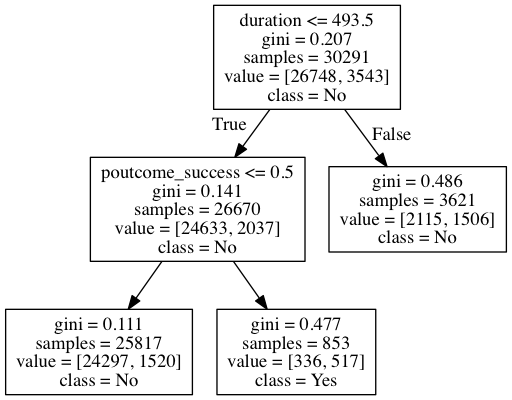

In [79]:
tree_viz = Source(tree.export_graphviz(tree1, out_file=None, feature_names=x_train.columns,class_names=['No','Yes']))
pic = tree_viz.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(pic)
from IPython.display import Image
Image(pic)

## Results:

### 1) As per the L2 regularized LR poutcome_success is the best feature, whereas for L1 regularized LR contact_unknown is the best feature.
### 2) when we compare the results of the Decision Tree with L1 and L2 LR's, the decision tree is uses duration and poutcome_success as main spliting features. Both, L1 and L2  doens't select the duration feature, for L2 it selects the poutcome_success as the best features which is used by decision tree at depth 2. L1 selects the poutcome_success as the second best feature.
### 3) Both in L1 and L2, almost all the features are same, only their ranking has been changed. There is one feature that has been changed in L1 compared to L2, L2 selects month_oct features whereas L1 selects the poutcome_unknown feature.

## z-scoring

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
s = StandardScaler()

In [82]:
x_train_s = s.fit_transform(x_train)
x_test_s = s.transform(x_test)

In [83]:
a = {}
a['X_train'] = x_train_s
a['y_train'] = y_train
a['X_test'] = x_test_s
a['y_test'] = y_test
a['target_names'] = ['no','yes']
a['feature_names'] = list(x_train.columns.values)
import pickle
pickle.dump(a, open("ppatel104.pickle", "wb")) 

## Logistic Regression on Z-scored Data

## L2 reularized Logistic Regression

In [84]:
clf2 = LogisticRegression(penalty='l2',random_state=367)
clf2.fit(x_train_s,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=367, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
l2 = []
for i in range(0,len(x_train.columns)):
    l2.append((x_train.columns[i],np.abs(clf2.coef_[0][i])))

In [86]:
print ("the top 10 features and their weights for l1 regularization")
sorted(l2,key=lambda x:x[1],reverse=True)[:10]

the top 10 features and their weights for l1 regularization


[('duration', 1.045704240005612),
 ('contact_unknown', 0.42021968906187435),
 ('poutcome_success', 0.35544841755395851),
 ('contact_cellular', 0.33484549286349041),
 ('campaign', 0.298765418740498),
 ('month_jun', 0.27832106246792032),
 ('month_mar', 0.19725126399754653),
 ('month_jul', 0.1818998299946889),
 ('housing_no', 0.17115315961034566),
 ('housing_yes', 0.17115315961034566)]

## L1 regularized Logistic Regression

In [87]:
clf3 = LogisticRegression(penalty='l1',random_state=367)
clf3.fit(x_train_s,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=367, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
l3 = []
for i in range(0,len(x_train.columns)):
    l3.append((x_train.columns[i],np.abs(clf3.coef_[0][i])))

In [89]:
print ("the top 10 features and their weights for l1 regularization")
sorted(l3,key=lambda x:x[1],reverse=True)[:10]

the top 10 features and their weights for l1 regularization


[('duration', 1.0458236117538113),
 ('contact_unknown', 0.65452726346757528),
 ('poutcome_success', 0.39351390231229239),
 ('campaign', 0.29814851460234504),
 ('month_jun', 0.29739491587699768),
 ('housing_no', 0.2884469465767287),
 ('month_mar', 0.20357952819549838),
 ('month_oct', 0.1619018424463847),
 ('month_jul', 0.15931497796745797),
 ('month_jan', 0.15015921481915173)]

In [90]:
tree2= DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005,random_state=367)

In [91]:
tree2.fit(x_train_s,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=367,
            splitter='best')

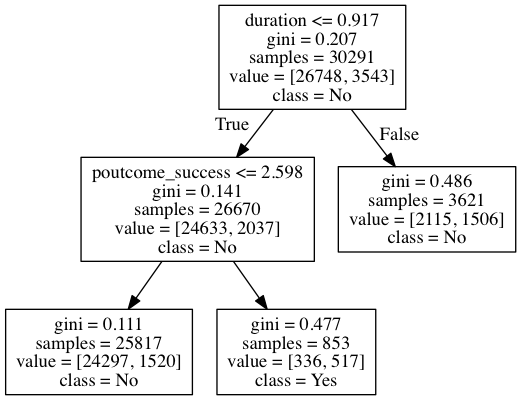

In [92]:
tree_viz = Source(tree.export_graphviz(tree2, out_file=None, feature_names=x_train.columns,class_names=['No','Yes']))
pic = tree_viz.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(pic)
from IPython.display import Image
Image(pic)

## Results:

### 1) On z-scored data, both L1 and L2 have the same top 3 features two of which are used by the Decision Tree Classifier as the main spliting features. L1, L2, and Decision Tree all of them selects the duration as the main feature.
### 2) In the duration features defines the last contact duration (in seconds), this attribute highly affects the target class because if the duration is 0 then y = 'No'. Yet, the duration is not known before the call is performed. Also, after the end of the call y is obviously known. 
### 3) In L1 and L2 in top to features, two features are different.

## Evidence

In [93]:
clf4 = LogisticRegression(penalty='l2',random_state=367)
clf4.fit(x_train_s,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=367, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
total_pos_evi = {}
total_neg_evi = {}
pos_evi_feat = {}
neg_evi_feat = {}

In [95]:
for i in range(0,len(x_test_s)):
    pos_feat = {}
    neg_feat = {}
    pos_evd = 0
    neg_evd = 0
    if(clf.intercept_[0]>0):
        pos_evd = clf.intercept_[0]
    else:
        neg_evd = clf.intercept_[0]
    evidence = x_test_s[i] * clf4.coef_[0]
    for j in range(0,len(evidence)):
        if(evidence[j]>0):
            pos_evd += evidence[j]
            pos_feat[j] = evidence[j]
        elif(evidence[j]<0):
            neg_evd += evidence[j]
            neg_feat[j] = evidence[j]
    total_pos_evi[i] = pos_evd
    total_neg_evi[i] = neg_evd
    pos_evi_feat[i] = pos_feat
    neg_evi_feat[i] = neg_feat

In [96]:
test_prob = clf.predict_proba(x_test_s)
pos_obj_index = np.argmax(test_prob[:,0])
neg_obj_index = np.argmax(test_prob[:,1])

### 1) The most positive object with respect to the probabilities.

In [97]:
print ("1) The total positive log-evidence: %f\n"%total_pos_evi[pos_obj_index])
print ("2) The total negative log-evidence: %f\n"%total_neg_evi[pos_obj_index])
print ("3) Class Distribution:")
print ("Class-1 Probability:%f"%test_prob[pos_obj_index][0])
print ("Class-0 Probaility: %f\n"%test_prob[pos_obj_index][1])
print ("4) Top 3 features values that contribute most to the positive evidence")
top3_pos_feat_index = sorted(pos_evi_feat[pos_obj_index], key=pos_evi_feat[pos_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_pos_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_pos_feat_index[1]])
print ("Third Feature: %s\n"%x_test.columns[top3_pos_feat_index[2]])
print ("5)Top 3 feature values that contribute the most to the negative evidence.")
top3_neg_feat_index = sorted(neg_evi_feat[pos_obj_index], key=neg_evi_feat[pos_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_neg_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_neg_feat_index[1]])
print ("Third Feature: %s"%x_test.columns[top3_neg_feat_index[2]])

1) The total positive log-evidence: 1.329889

2) The total negative log-evidence: -3.830849

3) Class Distribution:
Class-1 Probability:0.999984
Class-0 Probaility: 0.000016

4) Top 3 features values that contribute most to the positive evidence
First Feature: contact_unknown
Second Feature: contact_cellular
Third Feature: campaign

5)Top 3 feature values that contribute the most to the negative evidence.
First Feature: education_unknown
Second Feature: job_unknown
Third Feature: job_unemployed


### 2) The most negative object with respect to the probabilities.¶

In [98]:
print ("1) The total positive log-evidence: %f\n"%total_pos_evi[neg_obj_index])
print ("2) The total negative log-evidence: %f\n"%total_neg_evi[neg_obj_index])
print ("3) Class Distribution:")
print ("Class-1 Probability:%f"%test_prob[neg_obj_index][0])
print ("Class-0 Probaility: %f\n"%test_prob[neg_obj_index][1])
print ("4) Top 3 features values that contribute most to the positive evidence")
top3_pos_feat_index = sorted(pos_evi_feat[neg_obj_index], key=pos_evi_feat[neg_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_pos_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_pos_feat_index[1]])
print ("Third Feature: %s\n"%x_test.columns[top3_pos_feat_index[2]])
print ("5)Top 3 feature values that contribute the most to the negative evidence.")
top3_neg_feat_index = sorted(neg_evi_feat[neg_obj_index], key=neg_evi_feat[neg_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_neg_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_neg_feat_index[1]])
print ("Third Feature: %s"%x_test.columns[top3_neg_feat_index[2]])

1) The total positive log-evidence: 6.391614

2) The total negative log-evidence: -1.670499

3) Class Distribution:
Class-1 Probability:0.000000
Class-0 Probaility: 1.000000

4) Top 3 features values that contribute most to the positive evidence
First Feature: poutcome_success
Second Feature: month_mar
Third Feature: job_student

5)Top 3 feature values that contribute the most to the negative evidence.
First Feature: education_unknown
Second Feature: job_unknown
Third Feature: job_unemployed


### 3) The object that has the largest positive evidence.

In [99]:
largest_pos_evd = sorted(total_pos_evi, key=total_pos_evi.get,reverse=True)
largest_pos_obj_index = largest_pos_evd[0]

In [100]:
print ("1) The total positive log-evidence: %f\n"%total_pos_evi[largest_pos_obj_index])
print ("2) The total negative log-evidence: %f\n"%total_neg_evi[largest_pos_obj_index])
print ("3) Class Distribution:")
print ("Class-1 Probability:%f"%test_prob[largest_pos_obj_index][0])
print ("Class-0 Probaility: %f\n"%test_prob[largest_pos_obj_index][1])
print ("4) Top 3 features values that contribute most to the positive evidence")
top3_pos_feat_index = sorted(pos_evi_feat[largest_pos_obj_index], key=pos_evi_feat[largest_pos_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_pos_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_pos_feat_index[1]])
print ("Third Feature: %s\n"%x_test.columns[top3_pos_feat_index[2]])
print ("5)Top 3 feature values that contribute the most to the negative evidence.")
top3_neg_feat_index = sorted(neg_evi_feat[largest_pos_obj_index], key=neg_evi_feat[largest_pos_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_neg_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_neg_feat_index[1]])
print ("Third Feature: %s"%x_test.columns[top3_neg_feat_index[2]])

1) The total positive log-evidence: 16.254372

2) The total negative log-evidence: -2.516784

3) Class Distribution:
Class-1 Probability:0.552465
Class-0 Probaility: 0.447535

4) Top 3 features values that contribute most to the positive evidence
First Feature: duration
Second Feature: month_jun
Third Feature: housing_no

5)Top 3 feature values that contribute the most to the negative evidence.
First Feature: education_unknown
Second Feature: balance
Third Feature: job_unknown


### 4) The object that has the largest negative evidence.

In [101]:
largest_neg_evd = sorted(total_neg_evi, key=total_neg_evi.get,reverse=True)
largest_neg_obj_index = largest_neg_evd[0]

In [102]:
print ("1) The total positive log-evidence: %f\n"%total_pos_evi[largest_neg_obj_index])
print ("2) The total negative log-evidence: %f\n"%total_neg_evi[largest_neg_obj_index])
print ("3) Class Distribution:")
print ("Class-1 Probability:%f"%test_prob[largest_neg_obj_index][0])
print ("Class-0 Probaility: %f\n"%test_prob[largest_neg_obj_index][1])
print ("4) Top 3 features values that contribute most to the positive evidence")
top3_pos_feat_index = sorted(pos_evi_feat[largest_neg_obj_index], key=pos_evi_feat[largest_neg_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_pos_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_pos_feat_index[1]])
print ("Third Feature: %s\n"%x_test.columns[top3_pos_feat_index[2]])
print ("5)Top 3 feature values that contribute the most to the negative evidence.")
top3_neg_feat_index = sorted(neg_evi_feat[largest_neg_obj_index], key=neg_evi_feat[largest_neg_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_neg_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_neg_feat_index[1]])
print ("Third Feature: %s"%x_test.columns[top3_neg_feat_index[2]])

1) The total positive log-evidence: 4.802560

2) The total negative log-evidence: -1.032780

3) Class Distribution:
Class-1 Probability:0.000001
Class-0 Probaility: 0.999999

4) Top 3 features values that contribute most to the positive evidence
First Feature: poutcome_success
Second Feature: month_jun
Third Feature: contact_unknown

5)Top 3 feature values that contribute the most to the negative evidence.
First Feature: education_unknown
Second Feature: job_unknown
Third Feature: job_unemployed


### 5) The most uncertain object (the probabilities are closest to 0.5)

In [103]:
# The most uncertain object with respect to the probabilities
print (min(enumerate(test_prob[:,0]),key=lambda x: abs(x[1]-0.5)))
print (min(enumerate(test_prob[:,1]),key=lambda x: abs(x[1]-0.5)))

(2868, 0.49998465091414523)
(2868, 0.50001534908585477)


In [104]:
uncertain_obj_index = 9599

In [105]:
print ("1) The total positive log-evidence: %f\n"%total_pos_evi[uncertain_obj_index])
print ("2) The total negative log-evidence: %f\n"%total_neg_evi[uncertain_obj_index])
print ("3) Class Distribution:")
print ("Class-1 Probability:%f"%test_prob[uncertain_obj_index][0])
print ("Class-0 Probaility: %f\n"%test_prob[uncertain_obj_index][1])
print ("4) Top 3 features values that contribute most to the positive evidence")
top3_pos_feat_index = sorted(pos_evi_feat[uncertain_obj_index], key=pos_evi_feat[uncertain_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_pos_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_pos_feat_index[1]])
print ("Third Feature: %s\n"%x_test.columns[top3_pos_feat_index[2]])
print ("5)Top 3 feature values that contribute the most to the negative evidence.")
top3_neg_feat_index = sorted(neg_evi_feat[uncertain_obj_index], key=neg_evi_feat[uncertain_obj_index].get,reverse=True)[0:3]
print ("First Feature: %s"%x_test.columns[top3_neg_feat_index[0]])
print ("Second Feature: %s"%x_test.columns[top3_neg_feat_index[1]])
print ("Third Feature: %s"%x_test.columns[top3_neg_feat_index[2]])

1) The total positive log-evidence: 1.769462

2) The total negative log-evidence: -3.805370

3) Class Distribution:
Class-1 Probability:0.492207
Class-0 Probaility: 0.507793

4) Top 3 features values that contribute most to the positive evidence
First Feature: month_jun
Second Feature: housing_no
Third Feature: housing_yes

5)Top 3 feature values that contribute the most to the negative evidence.
First Feature: education_unknown
Second Feature: job_unknown
Third Feature: job_unemployed


In [106]:
## End of the Ipython Notebook